<a href="https://colab.research.google.com/github/eooloyede/Data-Analytics/blob/main/Analysis_of_Crime_in_UK_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DF_ML = pd.read_csv('/content/sample_data/CleanDataforVisualisation.csv')
DF_ML

,Financial Year,Financial Quarter,Force Name,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,2012/13,1,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323.0
1,2012/13,1,Avon and Somerset,Violence against the person,Violence without injury,12,0.0
2,2012/13,1,Avon and Somerset,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1.0
3,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,71,0.0
4,2012/13,1,Avon and Somerset,Sexual offences,Other sexual offences,73,3.0
...,...,...,...,...,...,...,...
252091,2022/23,3,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,96612.0
252092,2022/23,3,UK Finance,Fraud offences,Fraud: UK Finance,UK Finance,128818.0
252093,2022/23,4,Action Fraud,Fraud offences,Fraud: Action Fraud,AF,78312.0
252094,2022/23,4,CIFAS,Fraud offences,Fraud: CIFAS,CIFAS,88141.0


In [ ]:
#Import Label Encoder from sklearn preprocessing
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [ ]:
DF_ML['Financial Year'] = label_encoder.fit_transform(DF_ML['Financial Year'])
DF_ML['Force Name'] = label_encoder.fit_transform(DF_ML['Force Name'])
DF_ML['Offence Group'] = label_encoder.fit_transform(DF_ML['Offence Group'])
DF_ML['Offence Subgroup'] = label_encoder.fit_transform(DF_ML['Offence Subgroup'])
DF_ML['Offence Code'] = label_encoder.fit_transform(DF_ML['Offence Code'])

In [ ]:
#View the New Transformed Dataset after Encoding
DF_ML

,Financial Year,Financial Quarter,Force Name,Offence Group,Offence Subgroup,Offence Code,Number of Offences
0,0,1,0,2,6,176,20323.0
1,0,1,1,9,30,12,0.0
2,0,1,1,3,12,135,1.0
3,0,1,1,7,14,128,0.0
4,0,1,1,7,14,130,3.0
...,...,...,...,...,...,...,...
252091,10,3,4,2,7,177,96612.0
252092,10,3,43,2,9,179,128818.0
252093,10,4,0,2,6,176,78312.0
252094,10,4,4,2,7,177,88141.0


In [ ]:
DF_ML.to_csv('EncodedDF_ML.csv')

In [ ]:
#Seperate into X and Y
Y_DF = DF_ML['Number of Offences']
X_DF = DF_ML[['Financial Year', 'Financial Quarter', 'Offence Group', 'Offence Subgroup', 'Offence Code']]

In [ ]:
#Divide Dataset to training and testing Dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(X_DF, Y_DF, test_size=0.3, random_state=1)

In [ ]:
#Import the model
from sklearn.svm import SVR
model_SVR = SVR(kernel='rbf')
model_SVR.fit(x_train, y_train)

SVR()

In [ ]:
y_predictRBF = model_SVR.predict(x_test)

In [ ]:
#Calculate the error to know the accuracy
from sklearn import metrics
import numpy as np
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predictRBF))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predictRBF))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predictRBF)))

Mean Squared Error:  2858988.475030286
Mean Absolute Error:  220.67899371621462
Root Mean Squared Error:  1690.8543624541664


In [ ]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predictLR = model_LR.predict(x_test)

In [ ]:
#Calculate the errors in prediction
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_predictLR))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_predictLR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predictLR)))

Mean Squared Error:  2807731.335346343
Mean Absolute Error:  336.04017692047074
Root Mean Squared Error:  1675.6286388535925


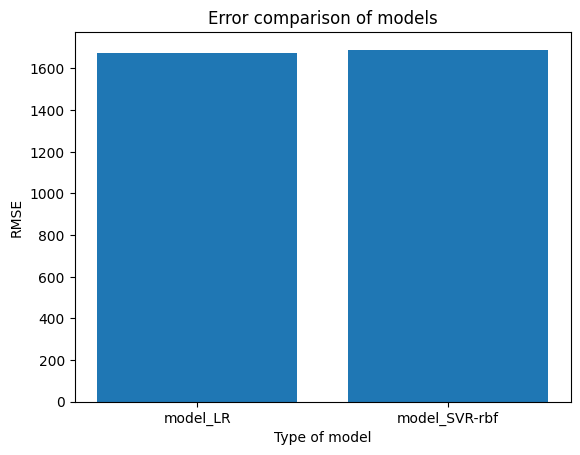

In [ ]:
#Visualize the model according to their error to get the best model
import matplotlib.pyplot as plt
model_LRE = np.sqrt(metrics.mean_squared_error(y_test, y_predictLR))
model_SVRrbfE = np.sqrt(metrics.mean_squared_error(y_test, y_predictRBF))
x_axis = ['model_LR', 'model_SVR-rbf']
y_axis = [model_LRE, model_SVRrbfE]
plt.xlabel('Type of model')
plt.ylabel('RMSE')
plt.title('Error comparison of models')
plt.bar(x_axis, y_axis)
plt.show()

In [ ]:
import pickle
pickle.dump(model_LR, open('modelLRass', 'wb'))
pickle.dump(model_SVR, open('modelSVRass', 'wb'))